# Workforce Scheduler

### Authors

Sara Carolina Gomez Delgado

Luis Eduardo Robles Jimenez

In [1]:
from data import * 
from genetic_algorithm import genetic_algorithm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def graph(points, lbl = None):
    if lbl is None: plt.scatter(np.arange(len(points)), points)
    else:
        plt.scatter(np.arange(len(points)), points, label = lbl)
        plt.legend()

(pR = 0.25, pM = 0.25)	->	-52750.2
(pR = 0.25, pM = 0.5)	->	-59520.7
(pR = 0.25, pM = 0.75)	->	-59840.1
(pR = 0.5, pM = 0.25)	->	-54115.5
(pR = 0.5, pM = 0.5)	->	-71346.0
(pR = 0.5, pM = 0.75)	->	-86966.0
(pR = 0.75, pM = 0.25)	->	-55940.4
(pR = 0.75, pM = 0.5)	->	-65727.1
(pR = 0.75, pM = 0.75)	->	-87713.9


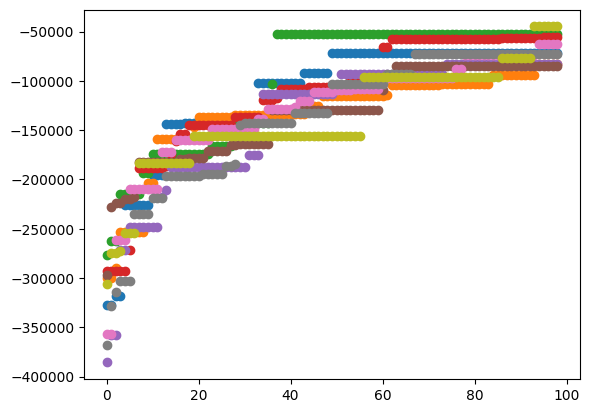

In [3]:
for pR in np.arange(0.25, 1, 0.25):
    for pM in np.arange(0.25, 1, 0.25):
        s, iter = 0, 10
        tracker, best = [], -1e10
        for i in range(iter):
            r = genetic_algorithm(rules, (breaks, areas, inventario, people), 50, 100, pRep = pR, pMut = pM, dim = (len(people), 7, 0, len(breaks)), debug = False)
            s += r['fitness']
            if not i or s > best:
                best = s
                tracker = r['bestTracker']
        graph(tracker)
        print("(pR = {}, pM = {})\t->\t{}".format(pR, pM, s/iter))
    

In [4]:
a = rules(r['solution'], breaks, areas, inventario, people, True)
print(a[0])
print("{} errors.".format(len(a[1])))
print(*a[1][:10], sep = '\n')

-91661.0
118 errors.
Persona 0 come igual que 1
Persona 0 come igual que 1
Persona 0 come igual que 1
Persona 0 descansa igual que 1
Persona 0 come igual que 1
Persona 0 descansa igual que 1
Persona 0 come igual que 1
Persona 0 come igual que 3
Persona 1 come igual que 0
Persona 1 come igual que 0


In [5]:
print("Nombre", "LUN", "MAR", "MIER", "JUE", "VIE", "SAB", "DOM", sep = "\t")
for i, p in enumerate(r['solution']):
    print(people[i][:6], end = '\t')
    for j, d in enumerate(p):
        print(codigos[d], end = '\t')
    print()

Nombre	LUN	MAR	MIER	JUE	VIE	SAB	DOM
Samant	4	2	4	M	2	D	2	
Luz	4	2	4	M	2	D	2	
Sonia	12	D	12	T	M	M	M	
Laura	4	D	M	2	4	4	M	
Maira	M	D	12	12	4	12	M	
Gloria	T	D	4	4	4	M	M	
Fernan	D	M	2	2	4	4	2	
Mariso	4	2	4	M	2	D	2	
Susy	4	2	4	M	2	D	2	
Diana	12	D	T	M	12	12	M	
Brayan	4	2	4	M	2	D	2	
Nallel	12	D	12	12	T	12	12	
Marlet	4	D	2	T	12	12	12	
Lucia	T	D	4	4	4	M	M	
Fabian	12	2	12	2	D	T	2	
Albert	4	2	4	M	2	D	2	
Elena	12	4	12	D	M	2	12	
Nancy	4	2	4	M	2	D	2	
Andrea	2	4	4	4	T	D	12	
Alma	4	D	2	T	12	12	12	
